lendo com pandas


In [1]:
import pandas as pd
import sqlite3   


conexao = sqlite3.connect('chinook.db.db')

tabela_clientes = pd.read_sql('select * from customers', conexao)

display(tabela_clientes[:5])





,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
1,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
2,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
3,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
4,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5


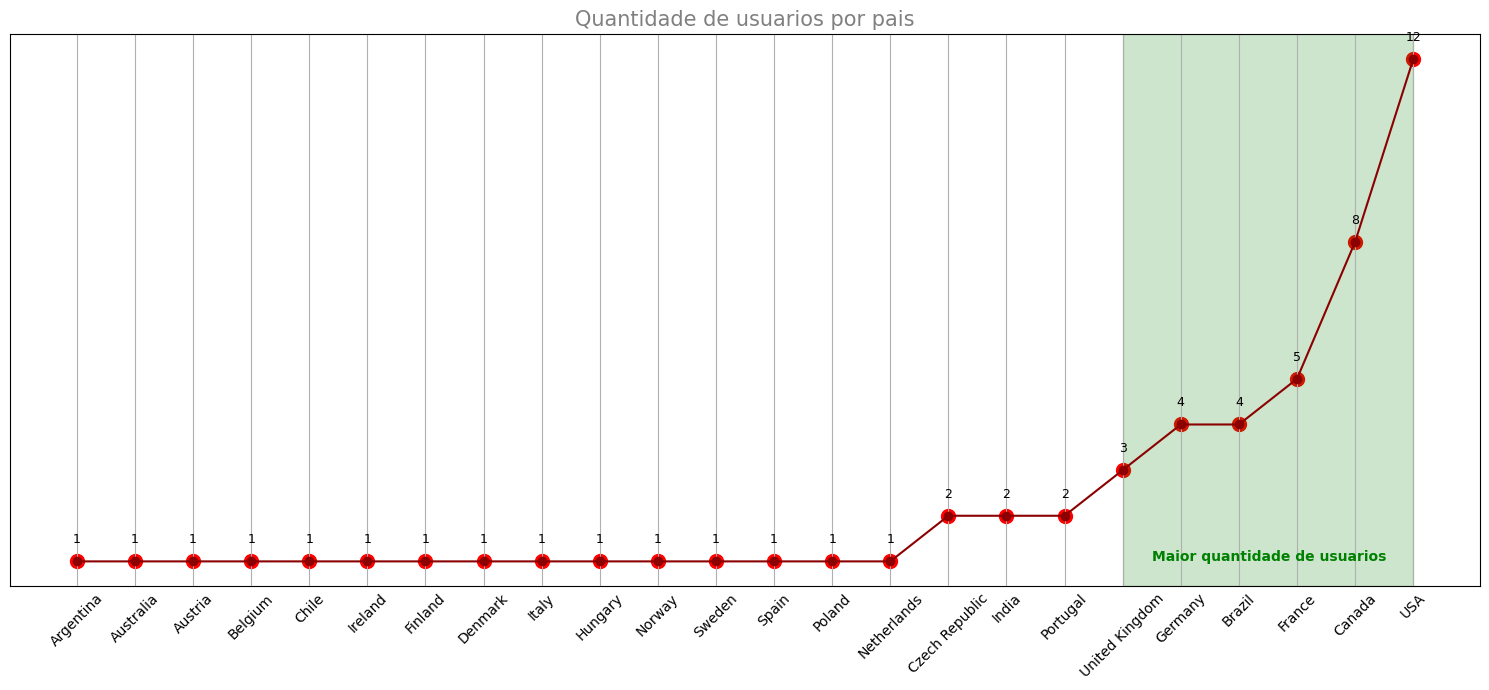

In [2]:
agrupamento = tabela_clientes.groupby('Country')['FirstName'].nunique().sort_values().reset_index()
agrupamento = agrupamento.set_index('Country')
agrupamento = agrupamento.rename(columns={'FirstName': 'Qtd. Clientes'})


import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(agrupamento.index, agrupamento.values, marker='o', color='darkred')
plt.scatter(agrupamento.index, agrupamento['Qtd. Clientes'], color='red', s=100)


plt.axvspan(18, 23, color='green', alpha=0.2)
plt.text(18.5, 1, 'Maior quantidade de usuarios', fontweight='bold', color='green')
plt.xticks(agrupamento.index ,rotation=45)

for i, valor in enumerate(agrupamento['Qtd. Clientes']):
    plt.text(i, valor + 0.4, str(valor), ha='center', fontsize=9)


plt.title('Quantidade de usuarios por pais', fontsize=15, color='gray')

plt.grid(True)

plt.yticks([])
plt.tick_params(axis='x', length=0)

plt.tight_layout()
plt.show()

conexao.close()